# Statistik-Labor Testat Aufgabe 1
***Hinweise:***
- Bitte überprüfen Sie Ihre Resultate vor der Abgabe Ihre Ergebnisse mit den Teilergebnissen aus der Datei ***Teilergebnisse_xy.txt***. In der Datei bekommen Sie jeweils die ersten beiden Nachkommastellen des Durchschnittsalters.
- Die Unterlagen sind im **pdf-Format** in Moodle hochgeladen abzugeben. Richtige Lösungen werden nicht mehr an Sie zurückgegeben. Eine Abgabe per Email ist nicht möglich.
- Bitte füllen Sie das jeweilige **Deckblatt** mit aus und geben es mit Ihrer Lösung zusammen ab.

***Aufgabenstellung:***<br>
Sie sollen für die Personalabteilung der NANUAG die Altersverteilung der Beschäftigten analysieren. <br>
In der Datei **sr_aufg_1_xy.txt** im Unterverzeichnis **Endziffer_xy** (*„xy“ steht für die beiden Endziffern Ihrer Matrikelnummer*) finden Sie die dafür erforderlichen Daten. <br>
Diese Datei enthält folgende fünf Felder, die durch Semikolons getrennt sind: Personalnummer, Anrede („Herr“ oder „Frau“), Vorname, Nachname, Geburtsdatum.

## 1. Daten einlesen
Lesen Sie Daten in **Python** bzw. ein **Jupyter Notebook** ein. Speichern Sie sie in einem **Pandas DataFrame** ab.

***Tipp:*** Bitte beachten Sie bei der Abgabe, dass Sie auf keinen Fall die Liste mit den 100 Datensätzen ausgeben! Verwenden Sie dafür zum Beispiel die `dataframe.head(x)`-Funktion.

In [12]:
import pandas as pd

def readData(sr_aufg_1_80) -> pd.DataFrame:
    # Daten einlesen
    df = pd.read_csv(sr_aufg_1_80,
                     sep=';',
                     header=None,
                     names=['Personalnummer', 'Anrede', 'Vorname', 'Nachname', 'Geburtsdatum'],
                     encoding='latin-1')  # encoding auf latin-1 wegen möglichen Probleme mit Umlauten zu verhindern
    pd.set_option('display.max_columns', None)
    print(df.head(10))  # Anzeigen der ersten 10 Datensätze
    return df

# Ersetzen Sie 'xy' im Dateinamen durch Ihre Matrikelnummer
file_path = 'sr_aufg_1_80.txt'
df = readData(file_path) 

   Personalnummer Anrede      Vorname    Nachname Geburtsdatum
0               1   Frau          Eva       Lange   04.04.1983
1               2   Herr      Steffen      Gerber   12.04.1983
2               3   Frau        Hanna    Bischoff   09.06.1958
3               4   Herr       Tobias     Schäfer   29.11.1968
4               5   Herr       Dieter        Lenz   15.02.1975
5               6   Frau  Nina Seidel  08.10.1958          NaN
6               7   Frau    Katharina      Schmid   13.07.1963
7               8   Frau       Ulrike    Fröhlich   08.08.1961
8               9   Frau     Brigitte       Huber   09.09.1955
9              10   Frau          Eva        Mann   13.11.1982


## 2. Daten bereinigen
Führen Sie eine Datenbereinigung durch. <br>
Listen Sie in einer Tabelle auf, welche (Daten-)Sätze Sie gelöscht und welche Sätze Sie wie korrigiert haben. 

***Tipp:*** Sie können hierzu die Python Funktionen `dataframe.drop()` und `dataframe.at()` verwenden. <br>
***Beispiellösung:***
![Beispiellösung](https://drive.google.com/uc?id=1z5Gydg1HzoxZLo428862fsgsKyaHKKm9)

In [17]:
import pandas as pd

file_path = 'sr_aufg_1_80.txt'

# Daten einlesen
df = pd.read_csv(file_path, sep=';', header=None, names=['Personalnummer', 'Anrede', 'Vorname', 'Nachname', 'Geburtsdatum'], encoding='latin-1')


rows_to_drop = [15, 26, 28, 48, 49, 70, 92, 111]
clean_df = df.drop(rows_to_drop)

desired_indices = [5, 15, 26, 28, 39, 48, 49, 53, 56, 70, 92, 111]

# Verwenden der loc-Methode, um die Zeilen mit den gewünschten Indexen auszuwählen
desired_rows = df.loc[desired_indices]
       
        # Zeile 53 bearbeiten
index_to_modify = 53
new_birthdate = '28. 12. 1963'  # Das neue Geburtsdatum
df.at[index_to_modify, 'Geburtsdatum'] = new_birthdate

        # Zeile 39 bearbeiten
index_to_modify = 39
new_birthdate = '31. 08. 1948'  # Das neue Geburtsdatum
df.at[index_to_modify, 'Geburtsdatum'] = new_birthdate

 # Zeile 5 bearbeiten
index_to_modify = 5
new_firstname = 'Nina; '
df.at[index_to_modify, 'Vorname'] = new_firstname
new_name = 'Seidel'
df.at[index_to_modify, 'Nachname'] = new_name
df.at[index_to_modify, 'Geburtsdatum'] = '08.10.1958'


# Zeile 56 bearbeiten
index_to_modify = 56
new_firstname = 'Joachim; '
df.at[index_to_modify, 'Vorname'] = new_firstname


these_indices = [15, 26, 28, 48, 49, 70, 92, 111]
those_indices = [5, 39, 53, 56]

# Der gleiche Wert für Fehler-Typ und Datensatz
fehler_typ_gleicher_wert = 'Unsinn'
datensatz_gleicher_wert = 'Löschen'

# Schleife durch die gewünschten Indizes und setze denselben Wert für Fehler-Typ und Datensatz
for index in these_indices:
    # Setze den gleichen Wert in den neuen Spalten
    df.at[index, 'Typ des Fehlers'] = fehler_typ_gleicher_wert
    df.at[index, 'Datensatz?'] = datensatz_gleicher_wert
    
    
    # Der gleiche Wert für Fehler-Typ und Datensatz
fehler_typ_gleicher_wert = 'Monat reicht für Alter'
datensatz_gleicher_wert = 'Korrektur'

# Schleife durch die gewünschten Indizes und setze denselben Wert für Fehler-Typ und Datensatz
for index in those_indices:
    # Setze den gleichen Wert in den neuen Spalten
    df.at[index, 'Typ des Fehlers'] = fehler_typ_gleicher_wert
    df.at[index, 'Datensatz?'] = datensatz_gleicher_wert
    

# Zeige die ausgewählten Zeilen aus dem ursprünglichen DataFrame
selected_rows_df = df.loc[desired_indices]

# Zeige die ausgewählten Zeilen
selected_rows_df





,Personalnummer,Anrede,Vorname,Nachname,Geburtsdatum,Typ des Fehlers,Datensatz?
5,6,Frau,Nina;,Seidel,08.10.1958,Monat reicht für Alter,Korrektur
15,16,Herr,Johannes,Bauer,,Unsinn,Löschen
26,27,Frau,Stefanie,Sommer,14.05.19zy,Unsinn,Löschen
28,29,Frau,Claudia,Förster,12. Februar,Unsinn,Löschen
39,40,Herr,Thomas,Hoffmann,31. 08. 1948,Monat reicht für Alter,Korrektur
48,49,Frau,Gaby,Rau,22.11.802,Unsinn,Löschen
49,50,Frau,Alexandra,Vogler,24.,Unsinn,Löschen
53,54,Herr,Peter,Strauß,28. 12. 1963,Monat reicht für Alter,Korrektur
56,57,Frau,Joachim;,Schindler,03.08.1970,Monat reicht für Alter,Korrektur
70,71,Frau,Katharina,Fleischer,04.02.25402,Unsinn,Löschen


## 3. Alter bestimmen
Berechnen Sie das Alter der Beschäftigten zum Stichtag 31.12.2005. Mit „Alter“ ist hier die Anzahl der vollendeten Lebensjahre gemeint. <br>
*Beispiel:* Wer am 30.06.1975 geborgen ist, ist zum Stichtag 30 Jahre alt. <br>
(Niemand würde von sich sagen, er wäre „30,5 Jahre alt“.) Folglich wird diese Person in der Alterklasse 21 – 30 Jahre mitgezählt.

***Tipp:*** In Python ist hierzu die Pandas-Bibliothek mit ihre Funktion `pandas.to_datetime()`, sowie `pandas.year` nützlich.

In [18]:
        # Zeile 53 bearbeiten
index_to_modify = 53
new_birthdate = '28. 12. 1963'  # Das neue Geburtsdatum
clean_df.at[index_to_modify, 'Geburtsdatum'] = new_birthdate

        # Zeile 39 bearbeiten
index_to_modify = 39
new_birthdate = '31. 08. 1948'  # Das neue Geburtsdatum
clean_df.at[index_to_modify, 'Geburtsdatum'] = new_birthdate

# Zeile 5 bearbeiten
index_to_modify = 5
new_firstname = 'Nina;'
clean_df.at[index_to_modify, 'Vorname'] = new_firstname
new_name = 'Seidel'
df.at[index_to_modify, 'Nachname'] = new_name
df.at[index_to_modify, 'Geburtsdatum'] = '08.10.1958'

# Zeile 56 bearbeiten
index_to_modify = 56
new_firstname = 'Joachim;'
clean_df.at[index_to_modify, 'Vorname'] = new_firstname

In [19]:
#Geburtsdaten in ein Datumsformat
clean_df['Geburtsdatum'] = pd.to_datetime(clean_df['Geburtsdatum'], format='%d.%m.%Y', errors='coerce')

# Berechne das Alter zum Stichtag 31.12.2005
clean_df['Alter'] = 2005 - clean_df['Geburtsdatum'].dt.year

## 4. Säulendiagramm mit Altersverteilung
Stellen Sie die Altersverteilung der Beschäftigten in einem gruppierten Säulendiagramm dar, in dem Männer und Frauen getrennt ausgewiesen werden.<br>
Es sollen die Altersklassen bis (einschließlich) 20 Jahre, 21 – 30 Jahre, 31 – 40 Jahre, 41 – 50 Jahre und über 50 Jahre gewählt werden.

***Tipp:*** Sie benötigen hierfür die Python Bibliothek **Matplotlib** und **NumPy** sowie aus **Pandas** die Funktion `value_counts()`. <br>
***Beispiellösung:***
<div>
<img src="https://drive.google.com/uc?id=1f7Vz3JuSa958w8-dBTnPSI24hJxWa17F" width="300"/>
</div>

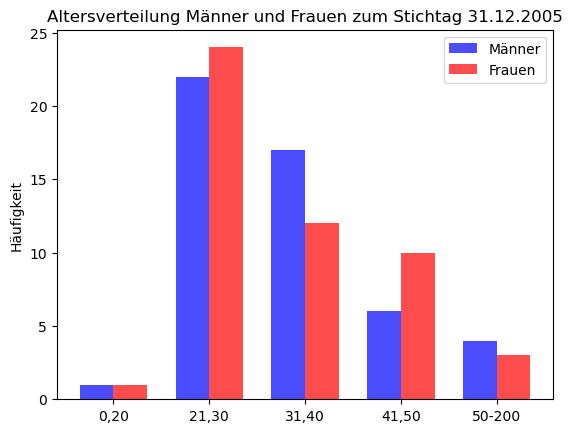

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Gruppiere die Daten nach Altersklassen (Beispiel: 21 - 30 Jahre)
age_bins = [0, 20, 30, 40, 50, 100]
clean_df['Altersklasse'] = pd.cut(clean_df['Alter'], bins=age_bins, right=False)

# Zähle die Personen in jeder Altersklasse
age_counts = clean_df['Altersklasse'].value_counts().sort_index()
men_counts = clean_df[clean_df['Anrede'] == 'Herr']['Altersklasse'].value_counts().sort_index()
women_counts = clean_df[clean_df['Anrede'] == 'Frau']['Altersklasse'].value_counts().sort_index()
age_labels = ['0,20', '21,30','31,40','41,50', '50-200']

#Breite bestimmen
bar_width = 0.35

# Die x-Koordinaten für die Säulen für Männer und Frauen
x = np.arange(len(age_labels))

#Erstelle das Säulendiagramm
plt.bar(x - bar_width/2, men_counts, bar_width, label='Männer', color='b', alpha=0.7)
plt.bar(x + bar_width/2, women_counts, bar_width, label='Frauen', color='r', alpha=0.7)
        

#Säulendiagramm anpassen und beschriften
plt.title('Altersverteilung Männer und Frauen zum Stichtag 31.12.2005')
plt.ylabel('Häufigkeit')
plt.xticks(x, age_labels)
plt.legend()

#Printen
plt.show()

## 5. Kreis-/Tortendiagramm der Altersverteilung
Stellen Sie die Altersverteilung der männlichen Beschäftigten und der weiblichen Beschäftigten in je einem Kreisdiagramm („Tortendiagramm“) dar. <br>
Die Kreissektoren sind mit den zugehörigen Prozentzahlen zu beschriften. 

***Beispiellösung:***
<div>
<img src="https://drive.google.com/uc?id=17Z5Z8OgKw3DE4U_vD3axd7vhkkkD-N9m" width="300"/>
</div>

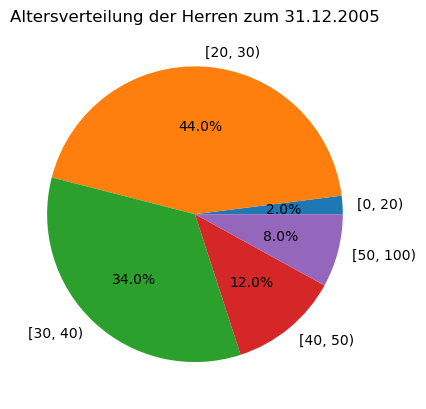

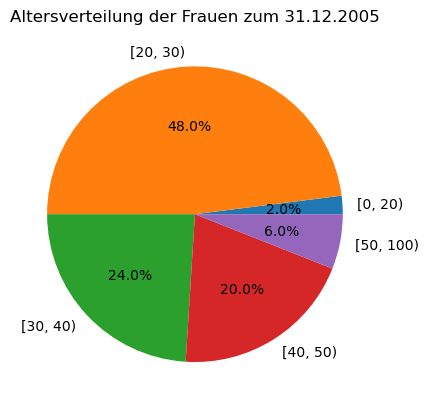

In [11]:
# in Plural ausgeben
gender_plural = {'Herr': 'Herren', 'Frau': 'Frauen'}

# Gruppieren der Daten nach Geschlecht und das Erstellen für jede Gruppe ein Kreisdiagramm
for gender in ['Herr', 'Frau']:
    plt.figure()
    clean_df[clean_df['Anrede'] == gender]['Altersklasse'].value_counts().sort_index().plot(kind='pie', autopct='%1.1f%%')
    plt.title(f'Altersverteilung der {gender_plural[gender]} zum 31.12.2005') 
    plt.ylabel('')
    plt.show()

## 6. Kennzahlen
Berechnen Sie **Mittelwert**, **empirische Varianz**, **empirische Standardabweichung**, **Median** und **Spannweite** der Alterszahlen: 
- für alle Beschäftigen und
- getrennt für Männer und Frauen.

***Beispiellösung:***
<div>
<img src="https://drive.google.com/uc?id=1adhKBVlds5OlO-9B5CClT2ybPolv5wVW" width="300"/>
</div>

In [7]:
mittelwert_gesamt = f"{round(clean_df['Alter'].mean(), 4):.4f}"
varianz_gesamt = f"{round(clean_df['Alter'].var(), 4):.4f}"
std_abweichung_gesamt = f"{round(clean_df['Alter'].std(), 2):.4f}"

# Berechnen Mittelwert, Varianz und Standardabweichung für Frauen
mittelwert_frauen = f"{round(clean_df[clean_df['Anrede'] == 'Frau']['Alter'].mean(), 4):.4f}"
varianz_frauen = f"{round(clean_df[clean_df['Anrede'] == 'Frau']['Alter'].var(), 4):.4f}"
std_abweichung_frauen = f"{round(clean_df[clean_df['Anrede'] == 'Frau']['Alter'].std(), 2):.4f}"

# Berechnen Mittelwert, Varianz und Standardabweichung für Herren
mittelwert_männer = f"{round(clean_df[clean_df['Anrede'] == 'Herr']['Alter'].mean(), 4):.4f}"
varianz_männer = f"{round(clean_df[clean_df['Anrede'] == 'Herr']['Alter'].var(), 4):.4f}"
std_abweichung_männer = f"{round(clean_df[clean_df['Anrede'] == 'Herr']['Alter'].std(), 2):.4f}"

# Berechnen Median
median_gesamt = f"{round(clean_df['Alter'].median()):.0f}"
median_frauen = f"{round(clean_df[clean_df['Anrede'] == 'Frau']['Alter'].median()):.0f}"
median_männer = f"{round(clean_df[clean_df['Anrede'] == 'Herr']['Alter'].median()):.0f}"

# Berechnen Spannweite
spannweite_gesamt = f"{round(clean_df['Alter'].max() - clean_df['Alter'].min()):.0f}"
spannweite_frauen = f"{round(clean_df[clean_df['Anrede'] == 'Frau']['Alter'].max() - clean_df[clean_df['Anrede'] == 'Frau']['Alter'].min()):.0f}"
spannweite_männer = f"{round(clean_df[clean_df['Anrede'] == 'Herr']['Alter'].max() - clean_df[clean_df['Anrede'] == 'Herr']['Alter'].min()):.0f}"



# Dataframe erstellen
finish_df = pd.DataFrame()

# Hinzufügen der Kategorien
finish_df['Kategorie'] = ['Mittelwert', 'Varianz', 'Std.-Abw.', 'Median', 'Spannweite']

# Werte für gesamt mit kontrollierter Rundung übergeben
finish_df['gesamt'] = [mittelwert_gesamt, varianz_gesamt, std_abweichung_gesamt, median_gesamt, spannweite_gesamt]

# Werte für Frauen mit kontrollierter Rundung übergeben
finish_df['Frauen'] = [mittelwert_frauen, varianz_frauen, std_abweichung_frauen, median_frauen, spannweite_frauen]

# Werte für Herren mit kontrollierter Rundung übergeben
finish_df['Männer'] = [mittelwert_männer, varianz_männer, std_abweichung_männer, median_männer, spannweite_männer]


finish_df = finish_df.set_index('Kategorie')

# Ausgeben
print(finish_df)

              gesamt    Frauen    Männer
Kategorie                               
Mittelwert   32.5980   32.3529   32.8431
Varianz     111.0943  104.3129  119.9749
Std.-Abw.    10.5400   10.2100   10.9500
Median            30        30        30
Spannweite        45        43        45
